# Double pendulum

Consider the pendulum suspended on the pendulum. We weill use dAlembert principle to derive eqaution of motion in generalized coordinaes. Naturally, we choose two angles as coordinates which comply with contraints.

In [74]:
var('t')
var('l1 l2 m1 m2 g')

xy_names = [('x1','x1'),('y1','y1'),('x2','x2'),('y2','y2')]
uv_names = [('phi1','\\varphi_1'),('phi2','\\varphi_2')]

In [75]:
load('cas_utils.sage')

In [76]:
to_fun, to_var = make_symbols(xy_names,uv_names)

phi1  :: has been  processed
phi2  :: has been  processed
x1  :: has been  processed
y1  :: has been  processed
x2  :: has been  processed
y2  :: has been  processed


In [77]:
x2u = {x1:l1*sin(phi1),\
       y1:-l1*cos(phi1),\
       x2:l1*sin(phi1)+l2*sin(phi2),\
       y2:-l1*cos(phi1)-l2*cos(phi2)}

In [78]:
transform_virtual_displacements(xy_names,uv_names,verbose=True)

dx1_polar : is added to namespace


[dx1, dphi1*l1*cos(phi1)]

dy1_polar : is added to namespace


[dy1, dphi1*l1*sin(phi1)]

dx2_polar : is added to namespace


[dx2, dphi1*l1*cos(phi1) + dphi2*l2*cos(phi2)]

dy2_polar : is added to namespace


[dy2, dphi1*l1*sin(phi1) + dphi2*l2*sin(phi2)]

[dphi1*l1*cos(phi1),
 dphi1*l1*sin(phi1),
 dphi1*l1*cos(phi1) + dphi2*l2*cos(phi2),
 dphi1*l1*sin(phi1) + dphi2*l2*sin(phi2)]

In [79]:
dAlemb = (m1*x1.subs(x2u).subs(to_fun).diff(t,2))*dx1_polar + \
         (m1*y1.subs(x2u).subs(to_fun).diff(t,2)+m1*g)*dy1_polar+\
         (m2*x2.subs(x2u).subs(to_fun).diff(t,2))*dx2_polar + \
         (m2*y2.subs(x2u).subs(to_fun).diff(t,2)+m2*g)*dy2_polar
dAlemb = dAlemb.subs(to_var)

In [80]:
showmath(dAlemb)

<IPython.core.display.Math object>

In [81]:
eq1 = dAlemb.expand().coefficient(dphi1).trig_simplify()
eq2 = dAlemb.expand().coefficient(dphi2).trig_simplify()
showmath(eq1)

<IPython.core.display.Math object>

In [82]:
showmath(eq2)

<IPython.core.display.Math object>

In [83]:
sol =  solve([eq1,eq2],[phi1dd,phi2dd])[0]

In [84]:
showmath(sol)

<IPython.core.display.Math object>

In [85]:
showmath( sol[0].rhs().denominator() )

<IPython.core.display.Math object>

In [86]:
(l1*(2*m1+m2-m2*cos(2*phi1-2*phi2))).expand_trig().expand_trig().expand().show()

-l1*m2*cos(phi1)^2*cos(phi2)^2 + l1*m2*cos(phi2)^2*sin(phi1)^2 - 4*l1*m2*cos(phi1)*cos(phi2)*sin(phi1)*sin(phi2) + l1*m2*cos(phi1)^2*sin(phi2)^2 - l1*m2*sin(phi1)^2*sin(phi2)^2 + 2*l1*m1 + l1*m2

In [87]:
bool ( -2*sol[0].rhs().denominator()==(l1*(2*m1+m2-m2*cos(2*phi1-2*phi2))).expand_trig().expand_trig().expand() )

True


Since the "textbook" solution contains a slightly different form, let's check if we have these formulas:

$$T(\varphi_1,\varphi_2,\dot{\varphi}_1,\dot{\varphi}_2) = \frac{m_1}{2} l_1^2 \dot{\varphi}_1^2 + \frac{m_2}{2} \left( l_1^2 \dot{\varphi}_1^2 + l_2^2 \dot{\varphi}_2^2 + 2 l_1 l_2 \dot{\varphi}_1 \dot{\varphi}_2 \cos(\varphi_1-\varphi_2) \right)$$ $$V(\varphi_1,\varphi_2) = -(m_1+m_2) g l_1 \cos\varphi_1 - m_2 g l_2 \cos\varphi_2$$
$$m_{2}l_{2}\ddot{\varphi}_{2}\cos\left(\varphi_{1}-\varphi_{2}\right)+\left(m_{1}+m_{2}\right)l_{1}\ddot{\varphi}_{1}+m_{2}l_{2}\dot{\varphi}_{2}^{2}\sin\left(\varphi_{1}-\varphi_{2}\right)+\left(m_{1}+m_{2}\right)g\sin\varphi_{1}=0$$
$$l_{2}\ddot{\varphi}_{2}+l_{1}\ddot{\varphi}_{1}\cos\left(\varphi_{1}-\varphi_{2}\right)-l_{1}\dot{\varphi}_{1}^{2}\sin\left(\varphi_{1}-\varphi_{2}\right)+g\sin\varphi_{2}=0$$

In [ ]:
rown_wiki = [m2*l2*cos(phi1-phi2)*phi2dd+(m1+m2)*l1*phi1dd+m2*l2*phi2d^2 * sin(phi1-phi2)+ (m1+m2)*g*sin(phi1),\
 l2*phi2dd+l1*cos(phi1-phi2)*phi1dd-l1*phi1d^2*sin(phi1-phi2)+g*sin(phi2)]

In [105]:
showmath(rown_wiki[0])

<IPython.core.display.Math object>

In [106]:
showmath(rown_wiki[1])

<IPython.core.display.Math object>

In [108]:
rown_wiki[0].show()

l2*m2*phi2d^2*sin(phi1 - phi2) + l2*m2*phi2dd*cos(phi1 - phi2) + l1*(m1 + m2)*phi1dd + g*(m1 + m2)*sin(phi1)

In [109]:
(eq1/l1).reduce_trig().show()

-l2*m2*phi2d^2*sin(-phi1 + phi2) + l2*m2*phi2dd*cos(-phi1 + phi2) + l1*m1*phi1dd + l1*m2*phi1dd + g*m1*sin(phi1) + g*m2*sin(phi1)

In [110]:
rown_wiki[0].show()

l2*m2*phi2d^2*sin(phi1 - phi2) + l2*m2*phi2dd*cos(phi1 - phi2) + l1*(m1 + m2)*phi1dd + g*(m1 + m2)*sin(phi1)

In [115]:
bool((eq1/l1) == rown_wiki[0] )

True

In [116]:
(eq2/l2/m2).reduce_trig().show()
rown_wiki[1].show()

l1*phi1d^2*sin(-phi1 + phi2) + l1*phi1dd*cos(-phi1 + phi2) + l2*phi2dd + g*sin(phi2)

-l1*phi1d^2*sin(phi1 - phi2) + l1*phi1dd*cos(phi1 - phi2) + l2*phi2dd + g*sin(phi2)

In [114]:
bool((eq2/l2/m2) == rown_wiki[1] )

True

## Euler -Langrange


In [117]:
Ekin = 1/2*(m1*x1.subs(x2u).subs(to_fun).diff(t).subs(to_var)^2+\
m1*y1.subs(x2u).subs(to_fun).diff(t).subs(to_var)^2+\
m2*x2.subs(x2u).subs(to_fun).diff(t).subs(to_var)^2+\
m2*y2.subs(x2u).subs(to_fun).diff(t).subs(to_var)^2 )

Epot = m1*g*y1.subs(x2u)+m2*g*y2.subs(x2u)

In [118]:
showmath( Epot.collect(cos(phi1)) )

<IPython.core.display.Math object>

In [119]:
showmath( Ekin.trig_simplify() )

<IPython.core.display.Math object>

In [120]:
L = Ekin - Epot


In [121]:
EL1 = L.diff(phi1d).subs(to_fun).diff(t).subs(to_var) - L.diff(phi1)
EL2 = L.diff(phi2d).subs(to_fun).diff(t).subs(to_var) - L.diff(phi2)

In [122]:
EL1 = (EL1/l1).trig_reduce()
EL2 = (EL2/l2).trig_reduce()
showmath(EL1)

<IPython.core.display.Math object>

In [123]:
sol =  solve([EL1,EL2],[phi1dd,phi2dd])[0]
show(sol)

[phi1dd == -(l1*m2*phi1d^2*cos(-phi1 + phi2)*sin(-phi1 + phi2) + l2*m2*phi2d^2*sin(-phi1 + phi2) + g*m2*cos(-phi1 + phi2)*sin(phi2) - (g*m1 + g*m2)*sin(phi1))/(l1*m2*cos(-phi1 + phi2)^2 - l1*m1 - l1*m2),
 phi2dd == (l2*m2*phi2d^2*cos(-phi1 + phi2)*sin(-phi1 + phi2) - (g*m1 + g*m2)*cos(-phi1 + phi2)*sin(phi1) + g*m1*sin(phi2) + g*m2*sin(phi2) + (l1*m1*phi1d^2 + l1*m2*phi1d^2)*sin(-phi1 + phi2))/(l2*m2*cos(-phi1 + phi2)^2 - l2*m1 - l2*m2)]

In [128]:
expr = sol[0].rhs()

In [140]:
for ex_ in expr.factor().numerator().operands():
    show(ex_)

-l1*m2*phi1d^2*cos(-phi1 + phi2)*sin(-phi1 + phi2)

-l2*m2*phi2d^2*sin(-phi1 + phi2)

-g*m2*cos(-phi1 + phi2)*sin(phi2)

g*m1*sin(phi1)

g*m2*sin(phi1)

## Numerical analysis



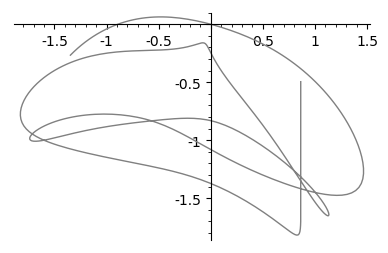

In [149]:
import numpy as np 

ode =  [phi1d,phi2d]+[sol[0].rhs(),sol[1].rhs()]
ode = map(lambda x:x.subs({l1:1,l2:1,m1:1,m2:1,g:9.81}),ode)

times = srange(0,5,.01)
numsol = desolve_odeint(ode,[2.1,0,0,0],times,[phi1,phi2,phi1d,phi2d])
p = line ( zip(np.sin(numsol[:,0])+np.sin(numsol[:,1]),\
               -np.cos(numsol[:,0])-np.cos(numsol[:,1])), color='gray' )
p.show(figsize=4)

In [147]:
def plot_dp(f1,f2,pars):
    mass1 = vector([x1,y1]).subs(x2u).subs(pars).subs({phi1:f1,phi2:f2})
    mass2 = vector([x2,y2]).subs(x2u).subs(pars).subs({phi1:f1,phi2:f2})
    plt = point([(0,0),mass1],aspect_ratio=1,size=40)
    plt += point(mass2,xmin=-2,xmax=2,ymin=-2,ymax=2,size=40)
    plt += line([(0,0),mass1,mass2],color='gray')

    return plt

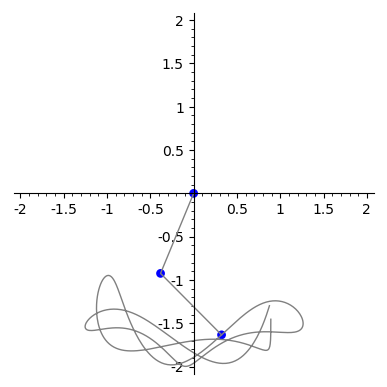

In [148]:
plot_dp(numsol[213,0],numsol[213,1],{l1:1,l2:1})+p

In [150]:
@interact
def _(ith=slider(0,numsol.shape[0]-1)):
    f1,f2 = numsol[ith,:2]
    plot_dp(f1,f2,{l1:1,l2:1}).show(axes=False)
    

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHgyYTA5NjljZjg+IHdpdGggMSB3aWRnZXQKICBpdGg6IFRyYW5zZm9ybUludFNsaWRlcih2YWx1ZT0wLCBkZXNjcmlwdGlvbj3igKY=


## Triple  pendulum

We can easily generalize our symbolic scheme to cases where the number of points is arbitrary.


In [22]:
N = 4
var('t g')
for i in range(1,1+N):
    var('l%d m%d'%(i,i))

In [23]:
xy_names = [('x%d'%i,'x_%d'%i) for i in range(1,1+N)] 
xy_names += [('y%d'%i,'y_%d'%i) for i in range(1,1+N)] 
uv_names = [ ('phi%d'%i,'\\varphi_%d'%i) for i in range(1,1+N)] 


In [4]:
load('cas_utils.sage')

In [5]:
to_fun, to_var = make_symbols(xy_names,uv_names)

phi1  :: has been  processed
phi2  :: has been  processed
phi3  :: has been  processed
phi4  :: has been  processed
x1  :: has been  processed
x2  :: has been  processed
x3  :: has been  processed
x4  :: has been  processed
y1  :: has been  processed
y2  :: has been  processed
y3  :: has been  processed
y4  :: has been  processed


In [6]:
ls = [vars()['l%d'%i] for i in range(1,1+N)]
xs = [vars()['x%d'%i] for i in range(1,1+N)]
ys = [vars()['y%d'%i] for i in range(1,1+N)]
phis = [vars()['phi%d'%i] for i in range(1,1+N)]
ms = [vars()['m%d'%i] for i in range(1,1+N)]

show(phis)

[phi1, phi2, phi3, phi4]

In [7]:
x2u = {x1:l1*sin(phi1),\
       y1:-l1*cos(phi1) }

for x_prev,x_,y_prev,y_,l_,phi_ in zip(xs[:-1],xs[1:],ys[:-1],ys[1:],ls[1:],phis[1:]):
    x2u[x_] = x2u[x_prev] + l_*sin(phi_)
    x2u[y_] = x2u[y_prev] - l_*cos(phi_)


In [8]:
transform_virtual_displacements(xy_names,uv_names,verbose=False)

[dphi1*l1*cos(phi1),
 dphi1*l1*cos(phi1) + dphi2*l2*cos(phi2),
 dphi1*l1*cos(phi1) + dphi2*l2*cos(phi2) + dphi3*l3*cos(phi3),
 dphi1*l1*cos(phi1) + dphi2*l2*cos(phi2) + dphi3*l3*cos(phi3) + dphi4*l4*cos(phi4),
 dphi1*l1*sin(phi1),
 dphi1*l1*sin(phi1) + dphi2*l2*sin(phi2),
 dphi1*l1*sin(phi1) + dphi2*l2*sin(phi2) + dphi3*l3*sin(phi3),
 dphi1*l1*sin(phi1) + dphi2*l2*sin(phi2) + dphi3*l3*sin(phi3) + dphi4*l4*sin(phi4)]

In [9]:
dxs = [vars()['dx%d_polar'%i] for i in range(1,1+N) ]
dys = [vars()['dy%d_polar'%i] for i in range(1,1+N) ]

In [10]:
dAlemb = sum( (m_*x_.subs(x2u).subs(to_fun).diff(t,2))*dx_ for m_,x_,dx_ in zip(ms,xs,dxs) )
dAlemb += sum( (m_*x_.subs(x2u).subs(to_fun).diff(t,2) + m_*g)*dx_ for m_,x_,dx_ in zip(ms,ys,dys) )
dAlemb = dAlemb.subs(to_var)

In [11]:
#showmath(dAlemb)

In [12]:
dphis = [vars()['dphi%d'%i] for i in range(1,1+N) ]

In [13]:
eqs = [dAlemb.expand().coefficient(dphi_).trig_simplify() for dphi_ in dphis]

In [14]:

showmath(eqs[2])

<IPython.core.display.Math object>

In [15]:
phidds = [vars()['phi%ddd'%i] for i in range(1,1+N) ]


In [16]:
sol =  solve(eqs,phidds)[0]

In [17]:
len(sol[1].rhs().trig_reduce().operands())

62

In [34]:
pars= {m_:1 for m_ in ms}

for i,l_ in enumerate(ls):
    pars[l_]  = 1/ (i+1)
pars[g] = 9.81

In [35]:
phidds

[phi1dd, phi2dd, phi3dd, phi4dd]

In [47]:
import numpy as np 

phids = [vars()['phi%dd'%i] for i in range(1,1+N) ]

ode =  phids + [sol_.rhs() for sol_ in sol]
ode = map(lambda x:x.subs(pars),ode)

times = srange(0,5,.01)

ics = [0]*(N*2)
ics[-1] = .01
ics[:N]= [pi.n()]*N
numsol = desolve_odeint(ode,ics,times, phis + phids)

In [48]:
phi_subs = lambda ith: {phi_:numval_ for phi_,numval_ in zip(phis,numsol[ith,:N])}

@interact
def _(ith=slider(0,numsol.shape[0]-1,step_size=10)):
    xnum = [0]+[x_.subs(x2u).subs(pars).subs(phi_subs(ith)) for x_ in xs]
    ynum = [0]+[x_.subs(x2u).subs(pars).subs(phi_subs(ith)) for x_ in ys]
    plt = line(zip(xnum,ynum),\
        xmin=-N,xmax=N,ymin=-N,ymax=N,marker='o')
    plt.show(axes=False,figsize=4,aspect_ratio=1)

SW50ZXJhY3RpdmUgZnVuY3Rpb24gPGZ1bmN0aW9uIF8gYXQgMHgxMTI1MGU1MDA+IHdpdGggMSB3aWRnZXQKICBpdGg6IFRyYW5zZm9ybUludFNsaWRlcih2YWx1ZT0wLCBkZXNjcmlwdGlvbj3igKY=


\newpage